In [96]:
!pip install fcapy
!pip install frozendict
!pip install ipynb
!pip install sparselinear
!pip install bitsets
!pip install bitarray
import torch
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.0.0+cuda118.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.0.0+cuda118.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-2.0.0+cuda118.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git

zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip


In [97]:
import pandas as pd
import numpy as np

In [98]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import neural_lib58 as nl
import matplotlib as plt
from sklearn.model_selection import train_test_split

In [99]:
from fcapy.context import FormalContext
from fcapy.lattice import ConceptLattice

from fcapy.visualizer import LineVizNx
import matplotlib.pyplot as plt

plt.rcParams['figure.facecolor'] = (1,1,1,1)

In [100]:
dataset = 'Bank_Marketing.csv'

In [101]:
data_filled = pd.read_csv(dataset)
data_filled

,id,default,housing,loan,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,pdays_731-854,balance<=0,0 < balance < 10000,balance > 10000,day < 15,day >= 15,campaign<=5,campaign>5,previous<=5,previous>5
0,h0,False,True,False,True,True,False,False,False,False,...,False,False,True,False,True,False,True,False,True,False
1,h1,False,False,False,True,True,False,False,False,False,...,False,False,True,False,True,False,True,False,True,False
2,h2,False,True,False,True,False,False,False,False,False,...,False,False,True,False,True,False,True,False,True,False
3,h3,False,True,False,True,False,False,False,False,False,...,False,False,True,False,True,False,True,False,True,False
4,h4,False,False,False,True,True,False,False,False,False,...,False,False,True,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,h11157,False,True,False,False,False,True,False,False,False,...,False,False,True,False,False,True,True,False,True,False
11158,h11158,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,True,False,True,False
11159,h11159,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,True,False,True,False
11160,h11160,False,False,True,False,False,False,False,False,False,...,False,True,False,False,True,False,True,False,True,False


In [102]:
# data_filled = pd.read_csv(dataset)

In [103]:
# data_filled.replace('?',np.nan,inplace=True)

In [104]:
# data_filled.replace({'n': 0,'y': 1},inplace=True)
# data_filled

In [105]:
data_filled.dropna(inplace = True)
data_filled

,id,default,housing,loan,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,pdays_731-854,balance<=0,0 < balance < 10000,balance > 10000,day < 15,day >= 15,campaign<=5,campaign>5,previous<=5,previous>5
0,h0,False,True,False,True,True,False,False,False,False,...,False,False,True,False,True,False,True,False,True,False
1,h1,False,False,False,True,True,False,False,False,False,...,False,False,True,False,True,False,True,False,True,False
2,h2,False,True,False,True,False,False,False,False,False,...,False,False,True,False,True,False,True,False,True,False
3,h3,False,True,False,True,False,False,False,False,False,...,False,False,True,False,True,False,True,False,True,False
4,h4,False,False,False,True,True,False,False,False,False,...,False,False,True,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,h11157,False,True,False,False,False,True,False,False,False,...,False,False,True,False,False,True,True,False,True,False
11158,h11158,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,True,False,True,False
11159,h11159,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,True,False,True,False
11160,h11160,False,False,True,False,False,False,False,False,False,...,False,True,False,False,True,False,True,False,True,False


In [106]:
# data_filled.replace({'democrat': False,'republican': True},inplace=True)
# data_filled

In [107]:
# data_filled.columns = ['Party',
#    'Infants',
#    'Water-project',
#    'Budget',
#    'Physician',
#    'El-salvador',
#    'Religion',
#    'Satellite',
#    'Nicaragua',
#    'Missile',
#    'Immigration',
#    'Synfuels',
#    'Education',
#    'Superfund',
#    'Crime',
#    'Duty-free',
#    'Export']

In [108]:
y = data_filled['deposit']
data_filled.drop(['deposit'], axis=1, inplace=True)

In [109]:
data_filled.replace({False: 0, True: 1},inplace=True)
data_filled

/var/folders/ym/ymvbx_ts67n0ln90hj1qmz8h0000gn/T/ipykernel_2220/1771202440.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_filled.replace({False: 0, True: 1},inplace=True)


,id,default,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,pdays_731-854,balance<=0,0 < balance < 10000,balance > 10000,day < 15,day >= 15,campaign<=5,campaign>5,previous<=5,previous>5
0,h0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
1,h1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
2,h2,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
3,h3,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
4,h4,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,h11157,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,1,1,0,1,0
11158,h11158,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,1,0
11159,h11159,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,1,0
11160,h11160,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0


In [110]:
data_filled.dropna(inplace = True)
data_filled

,id,default,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,pdays_731-854,balance<=0,0 < balance < 10000,balance > 10000,day < 15,day >= 15,campaign<=5,campaign>5,previous<=5,previous>5
0,h0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
1,h1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
2,h2,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
3,h3,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
4,h4,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,h11157,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,1,1,0,1,0
11158,h11158,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,1,0
11159,h11159,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,1,0
11160,h11160,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0


In [111]:
# data_filled.replace({'democrat': False,'republican': True},inplace=True)
# data_filled

In [112]:
data_filled['sample_id'] = np.arange(0, data_filled.shape[0], 1).astype(str)
data_filled['id'] = data_filled['sample_id'].apply(lambda x: 'h' + x)
data_filled.drop(columns=['sample_id'], inplace=True)
data_filled = data_filled.set_index('id')
data_filled

,default,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,pdays_731-854,balance<=0,0 < balance < 10000,balance > 10000,day < 15,day >= 15,campaign<=5,campaign>5,previous<=5,previous>5
id,,,,,,,,,,,,,,,,,,,,,
h0,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
h1,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
h2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
h3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
h4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
h11157,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,1,0,1,0
h11158,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,1,0
h11159,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,1,0


In [113]:
# y = data_filled['deposit']
# data_filled.drop(['deposit'], axis=1, inplace=True)

In [114]:
# data_filled.columns = ['Party',
#    'Infants',
#    'Water-project',
#    'Budget',
#    'Physician',
#    'El-salvador',
#    'Religion',
#    'Satellite',
#    'Nicaragua',
#    'Missile',
#    'Immigration',
#    'Synfuels',
#    'Education',
#    'Superfund',
#    'Crime',
#    'Duty-free',
#    'Export']

In [115]:
data_filled

,default,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,pdays_731-854,balance<=0,0 < balance < 10000,balance > 10000,day < 15,day >= 15,campaign<=5,campaign>5,previous<=5,previous>5
id,,,,,,,,,,,,,,,,,,,,,
h0,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
h1,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
h2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
h3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
h4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
h11157,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,1,0,1,0
h11158,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,1,0
h11159,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,1,0


In [116]:
# from sklearn.model_selection import train_test_split
# X_train_, X_rem, y_train_, y_rem = train_test_split(data_filled,y, train_size=0.6, random_state = 0)
# X_valid, X_test_, y_valid, y_test_ = train_test_split(X_rem,y_rem, test_size=0.5, random_state = 0)

In [117]:
from sklearn.cluster import KMeans
import random

In [121]:
from sklearn.cluster import SpectralClustering, AgglomerativeClustering

In [122]:
rss = int(random.random()*1000)

In [182]:
n_clusters_f1 = {}
n_clusters_f1[2] = []
n_clusters_f1[3] = []
n_clusters_f1[4] = []
n_clusters_f1[5] = []
n_clusters_f1[6] = []
n_clusters_f1[7] = []
n_clusters_f1[8] = []
n_clusters_f1[9] = []
n_clusters_f1[10] = []

for random_state in range(1, 5):
    print('rs', random_state)
    f1_scores_counts = pd.DataFrame(columns = ['# clusters','F1 test'])

    for n_clusters in range (2,11):
        
        print(n_clusters)
       # model = KMeans(n_clusters, random_state = random_state )
        
        #model.fit(data_filled)
        #all_predictions = model.predict(data_filled)]
        #model = SpectralClustering(n_clusters, random_state = random_state)
        model = AgglomerativeClustering(n_clusters)
        all_predictions = model.fit_predict(data_filled)
        
        df = pd.DataFrame(all_predictions, columns=['# clusters'])
        df['sample_id'] = np.arange(0, df.shape[0], 1).astype(str)
        df['id'] = df['sample_id'].apply(lambda x: 'h' + x)
        df.drop(columns=['sample_id'], inplace=True)
        df = df.set_index('id')
        for n in range(0, n_clusters):
            name = str(n)
            df[name] = df['# clusters'] == n
        df.drop(['# clusters'], axis=1, inplace=True)

        for col in df.columns:
            df[col] = df[col].mask(df[col] == True, 1)

        for col in df.columns:
            df[col] = df[col].mask(df[col] == False, 0)


        for col in df.columns:
            df[col] = df[col] == 0

        X_train_, X_rem, y_train_, y_rem = train_test_split(df,y, train_size=0.6, random_state = 5)
        X_valid, X_test_, y_valid, y_test_ = train_test_split(X_rem,y_rem, test_size=0.5, random_state = 5)

        K_train_ = FormalContext.from_pandas(X_train_)

        L_ = ConceptLattice.from_context(K_train_, algo='Sofia', is_monotone= True)
    
        L_ind= []
        for j in range (1, n_clusters+1):
             L_ind.append(j)


        f1_list = []
        f1_list_train = []
        f1_list_valid = []
        epochs_list = []

        for i in range (0, 1):
        #print(i)

            cn = nl.ConceptNetwork.from_lattice(L_, L_ind, sorted(set(y_train_))) 

            for i in range(20):
                k = 50
        #print('Epoch ', k*(i+1))
                epochs_list.append(k*(i+1))
                if i == 0:
                    cn.fit(X_train_, y_train_, k)
                else:
                    cn.fit_2(X_train_, y_train_, k)
            pred_all = cn.predict(X_test_)

            pred = pred_all[1]

    


        print('score test:', f1_score(y_test_, pred))
            #f1_list.append(f1_score(y_test_, pred))
        if f1_score(y_test_, pred)!=0:
            n_clusters_f1[n_clusters].append(f1_score(y_test_, pred))

for n_clusters in range(2, 11):
    f1_scores_counts.loc[len(f1_scores_counts)] = [n_clusters, round( sum(n_clusters_f1[n_clusters])/len(n_clusters_f1[n_clusters]),3)]
    
f1_scores_counts


f1_scores_counts.to_csv('Banking_Aggl19.csv')   
    
    

    

    
        
    
    

    

rs 1
2
score test: 0.45627376425855515
3
score test: 0.45627376425855515
4
score test: 0.6170488965815665
5
score test: 0.5641547861507128
6
score test: 0.5837891596220786
7
score test: 0.4420131291028446
8
score test: 0.6493837654058648
9
score test: 0.6031904287138584
10
score test: 0.6351851851851852
rs 2
2
score test: 0.45627376425855515
3
score test: 0.45627376425855515
4
score test: 0.45627376425855515
5
score test: 0.39529675251959684
6
score test: 0.5837891596220786
7
score test: 0.6031904287138584
8
score test: 0.6031904287138584
9
score test: 0.6351851851851852
10
score test: 0.6351851851851852
rs 3
2
score test: 0.45627376425855515
3
score test: 0.45627376425855515
4
score test: 0.6170488965815665
5
score test: 0.6170488965815665
6
score test: 0.5837891596220786
7
score test: 0.6493837654058648
8
score test: 0.6493837654058648
9
score test: 0.6351851851851852
10
score test: 0.6351851851851852
rs 4
2
score test: 0.45627376425855515
3
score test: 0.45627376425855515
4
score te

In [183]:
f1_scores_counts

,# clusters,F1 test
0,2.0,0.456
1,3.0,0.456
2,4.0,0.577
3,5.0,0.548
4,6.0,0.584
5,7.0,0.586
6,8.0,0.638
7,9.0,0.627
8,10.0,0.635


In [184]:
f1_scores_counts.to_csv('Banking_aggl19.csv')  

# Analysing part

In [175]:

n_clusters = 10
#model = SpectralClustering(n_clusters, random_state = 1)
model = AgglomerativeClustering(n_clusters)
#model.fit(data_filled)
#all_predictions = model.predict(data_filled)
all_predictions = model.fit_predict(data_filled)
df = pd.DataFrame(all_predictions, columns=['# clusters'])
df['sample_id'] = np.arange(0, df.shape[0], 1).astype(str)
df['id'] = df['sample_id'].apply(lambda x: 'h' + x)
df.drop(columns=['sample_id'], inplace=True)
df = df.set_index('id')
print(df)
for n in range(0, n_clusters):
    name = str(n)
    df[name] = df['# clusters'] == n
print(df)
df.drop(['# clusters'], axis=1, inplace=True)
for col in df.columns:
    df[col] = df[col].mask(df[col] == True, 1)
print(df)
for col in df.columns:
    df[col] = df[col].mask(df[col] == False, 0)
print(df)
for col in df.columns:
    df[col] = df[col] == 0
X_train_, X_rem, y_train_, y_rem = train_test_split(df,y, train_size=0.6, random_state = 5)
X_valid, X_test_, y_valid, y_test_ = train_test_split(X_rem,y_rem, test_size=0.5, random_state = 5)
K_train_ = FormalContext.from_pandas(X_train_)
L_ = ConceptLattice.from_context(K_train_, algo='Sofia', is_monotone= True)
L_ind= []
for j in range (1, n_clusters+1):
    L_ind.append(j)
L_ind

        # clusters
id                
h0               0
h1               0
h2               0
h3               0
h4               0
...            ...
h11157           2
h11158           7
h11159           2
h11160           1
h11161           2

[11162 rows x 1 columns]
        # clusters      0      1      2      3      4      5      6      7  \
id                                                                           
h0               0   True  False  False  False  False  False  False  False   
h1               0   True  False  False  False  False  False  False  False   
h2               0   True  False  False  False  False  False  False  False   
h3               0   True  False  False  False  False  False  False  False   
h4               0   True  False  False  False  False  False  False  False   
...            ...    ...    ...    ...    ...    ...    ...    ...    ...   
h11157           2  False  False   True  False  False  False  False  False   
h11158           7  False

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [176]:
df

,0,1,2,3,4,5,6,7,8,9
id,,,,,,,,,,
h0,False,True,True,True,True,True,True,True,True,True
h1,False,True,True,True,True,True,True,True,True,True
h2,False,True,True,True,True,True,True,True,True,True
h3,False,True,True,True,True,True,True,True,True,True
h4,False,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...
h11157,True,True,False,True,True,True,True,True,True,True
h11158,True,True,True,True,True,True,True,False,True,True
h11159,True,True,False,True,True,True,True,True,True,True


In [177]:
f1_list = []
f1_list_train = []
f1_list_valid = []
epochs_list = []

res_ = pd.DataFrame(columns = ['epoch', 'F1_score_train', 'F1_score_val', 'F1_score_test'])

cn = nl.ConceptNetwork.from_lattice(L_, L_ind, sorted(set(y_train_)))
#cn_ = nl.ConceptNetwork.from_lattice(L_, L_indices_, sorted(set(y_train_)))
for i in range(30):
    k = 50
    print('Epoch ', k*(i+1))
    epochs_list.append(k*(i+1))
    if i == 0:
        cn.fit(X_train_, y_train_, k)
    else:
        cn.fit_2(X_train_, y_train_, k)
    pred_all = cn.predict(X_test_)
    pred_train_all = cn.predict(X_train_)
    pred_val_all = cn.predict(X_valid)
    pred_valid = pred_val_all[1]
    pred = pred_all[1]
    pred_train = pred_train_all[1]
    

    print('score train:', f1_score(y_train_, pred_train))
    print('score val:', f1_score(y_valid, pred_valid))
    print('score test:', f1_score(y_test_, pred))
    f1_list.append(f1_score(y_test_, pred))
    f1_list_train.append(f1_score(y_train_, pred_train))
    f1_list_valid.append(f1_score(y_valid, pred_valid))
    #res_.loc[len(res_)] = [k*(i+1), f1_score(y_train_, pred_train), f1_score(y_valid, pred_valid), f1_score(y_test_, pred)]

    


Epoch  50
score train: 0.6389594553399045
score val: 0.6570397111913358
score test: 0.6409007912355448
Epoch  100
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  150
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  200
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  250
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  300
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  350
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  400
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  450
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  500
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  550
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  600
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  650
score train: 0.10507569011576136
score val: 0.11272416737830913
score test: 0.11940298507462686
Epoch  700
score train: 0.2511278195488722
score val: 0.25787965616045844
score test: 0.26785714285714285
Epoch  750
score train: 0.548132183

In [178]:
#f1_scores_counts = pd.DataFrame(columns = ['# clusters','F1 test'])

In [179]:
f1_scores_counts.loc[len(f1_scores_counts)] = [n_clusters, round(f1_list[-1],3)]
f1_scores_counts

,# clusters,F1 test
0,2.0,0.456
1,3.0,0.456
2,4.0,0.617
3,5.0,0.617
4,6.0,0.584
5,7.0,0.649
6,8.0,0.649
7,9.0,0.635
8,10.0,0.635


In [180]:
f1_scores_counts.to_csv('Banking_aggl19_single.csv')  

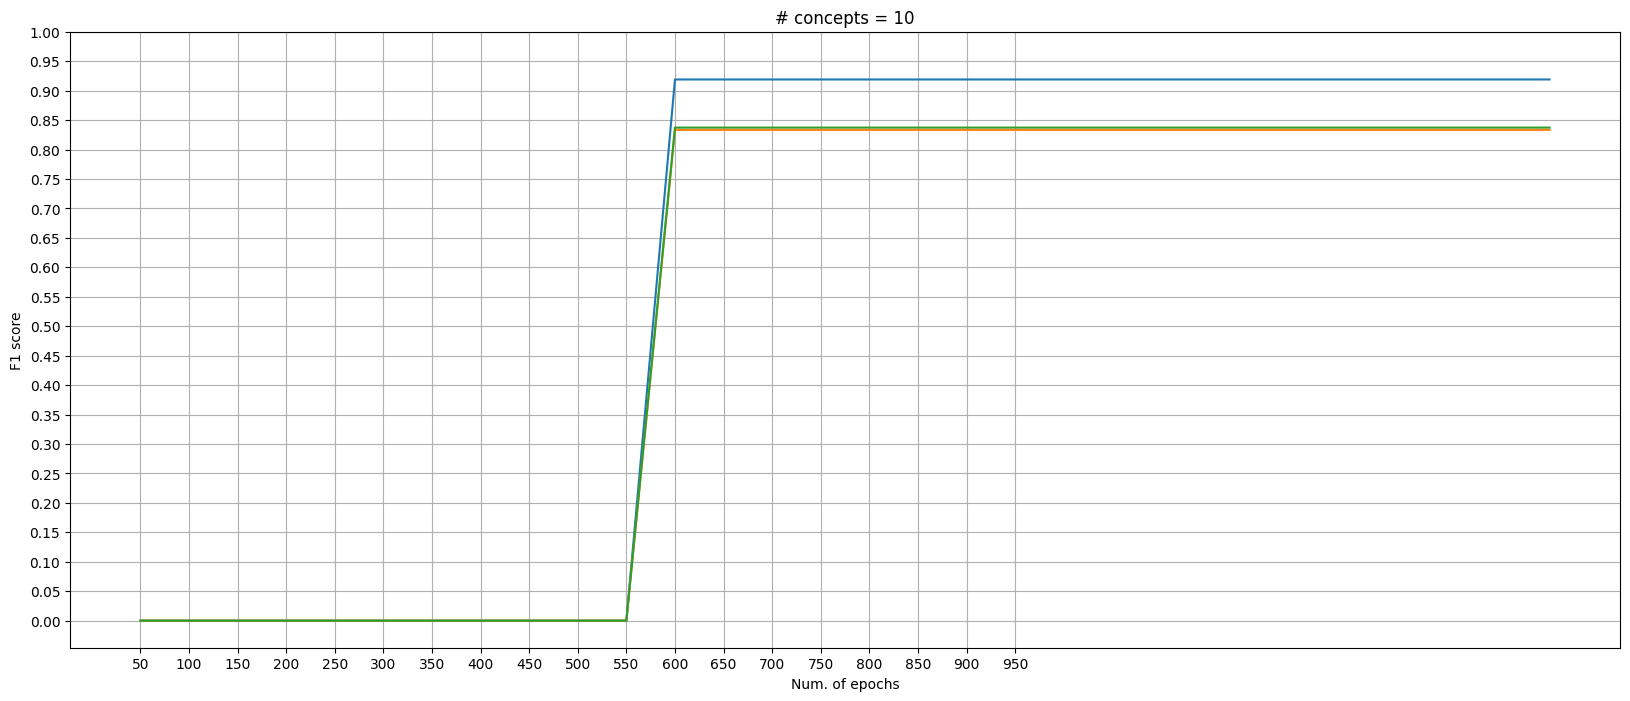

In [52]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,8))
plt.plot(epochs_list,f1_list )
plt.plot(epochs_list,f1_list_train)
plt.plot(epochs_list, f1_list_valid)
plt.title('# concepts = 10')#, n_concepts)
plt.xlabel("Num. of epochs")
plt.ylabel("F1 score")
plt.grid()
plt.xticks(np.arange(50, 1000, 50))
plt.yticks(np.arange(0, 1.05, 0.05))
plt.savefig('# concepts = 10')#, n_concepts)

In [53]:
res_[res_['epoch']== 1500]

,epoch,F1_score_train,F1_score_val,F1_score_test
29,1500.0,0.833333,0.837209,0.918919
